- The code is comparing the loss functions for both Mean Absolute Error (MAE) and Mean Squared Error (MSE) during the training of a regression model.

In [4]:
# Importing Libraries
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Train: 0.003, Test: 0.004


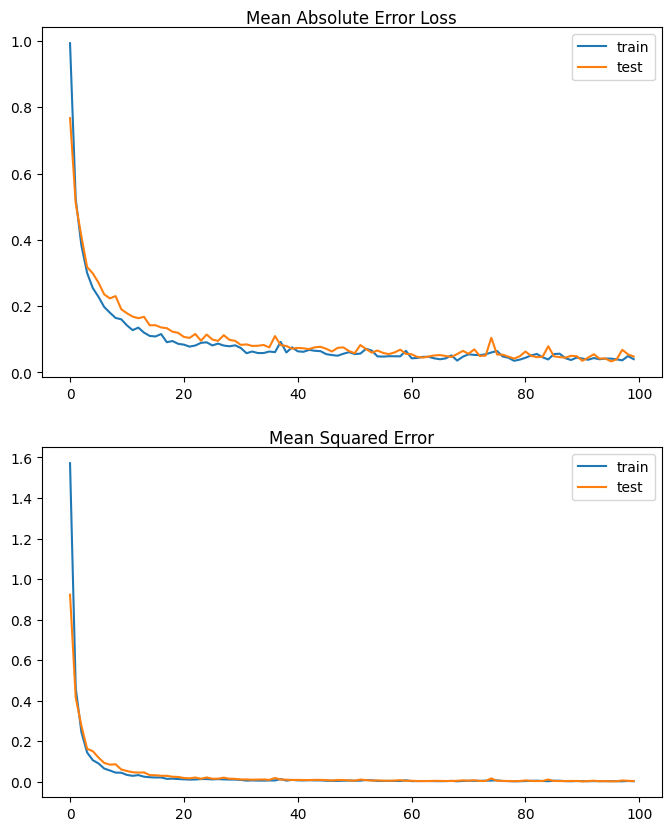

In [5]:
# Generating the Regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# Standardizing the model
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]

# Observations
n_train = 500

# Splitting the data into Training & Testing
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Defining the Model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# Fitting the Model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# Evaluating the Model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# Plotting MAE loss function during Training
pyplot.figure(figsize=(8, 10))
pyplot.subplot(211)
pyplot.title('Mean Absolute Error Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# Plotting MsE loss function during Training
pyplot.subplot(212)
pyplot.title('Mean Squared Error', pad=-20)
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()
